In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Understanding the Data

In [135]:
data= pd.read_csv(r'car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [136]:
data.shape

(19237, 18)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [138]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [139]:
data.duplicated().sum()

np.int64(313)

In [140]:
data.drop_duplicates(inplace=True)

In [141]:
data.shape

(18924, 18)

## 2. Basic Statistics

In [142]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [143]:
data.select_dtypes(include='object').describe()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [144]:
def top_and_bottom_counts(df, col, n=5):
    """
    Show the top and bottom 'n' frequent values for a column.
    """
    top_counts = df[col].value_counts().head(n)
    bottom_counts = df[col].value_counts().tail(n)
    return pd.concat([top_counts, bottom_counts])

# Loop through all object-type columns
for col in data.select_dtypes(include='object'):
    print(f'{col} value counts:')
    print(top_and_bottom_counts(data, col))
    print('First 30 unique values:', data[col].unique()[:30])
    print('-------------------')


Levy value counts:
Levy
-       5709
765      482
891      453
639      403
640      398
2308       1
4860       1
1641       1
1045       1
1901       1
Name: count, dtype: int64
First 30 unique values: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382']
-------------------
Manufacturer value counts:
Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, dtype: int64
First 30 unique values: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ'

In [145]:
data['Levy'].replace({'-': 0}, inplace=True)  # Replace '-' with 0
data['Levy'] = pd.to_numeric(data['Levy'])    # Convert the column to numeric type


C:\Users\alans\AppData\Local\Temp\ipykernel_11616\717987120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Levy'].replace({'-': 0}, inplace=True)  # Replace '-' with 0


In [146]:
data['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64

In [147]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')
data['Engine volume'] = pd.to_numeric(data['Engine volume'])

In [148]:
data['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [149]:
data.drop(['Doors'], axis=1, inplace=True)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

## 3. Variable Distribution

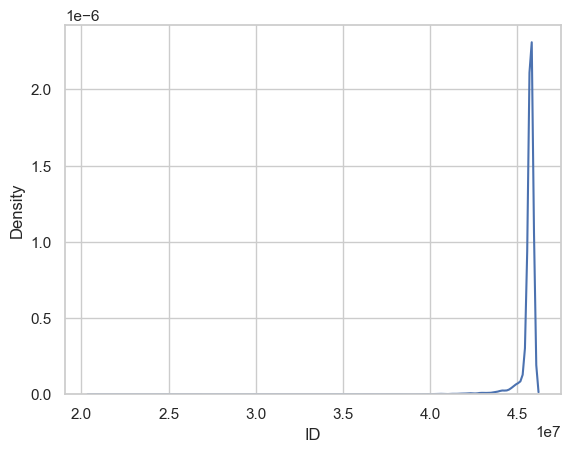

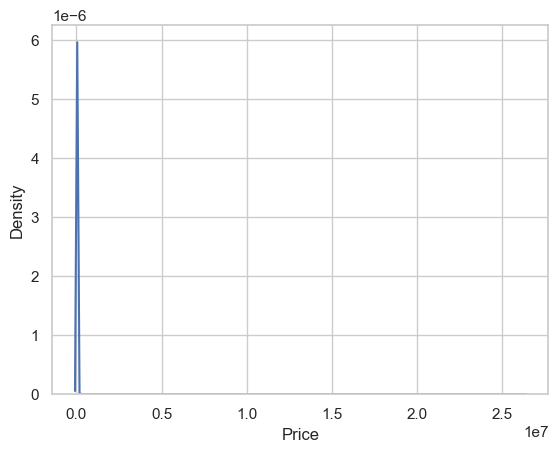

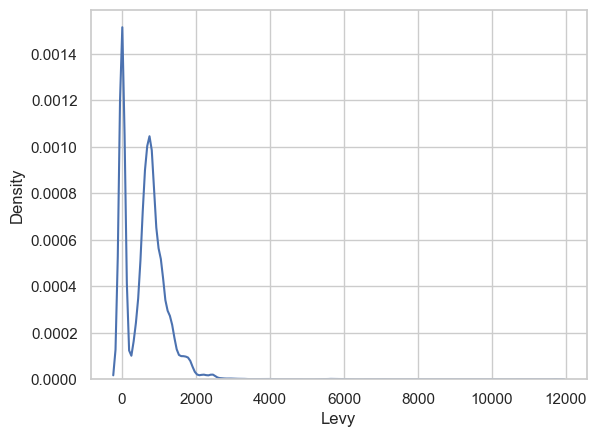

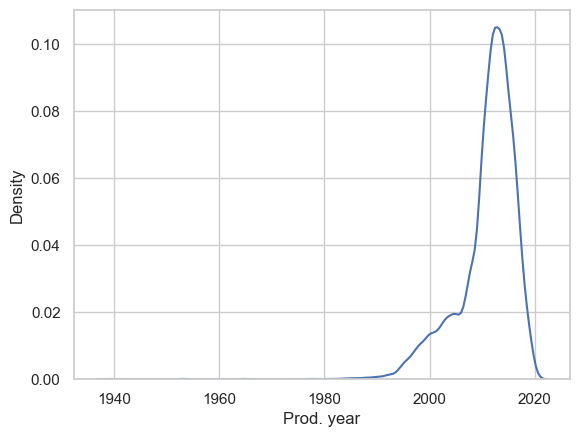

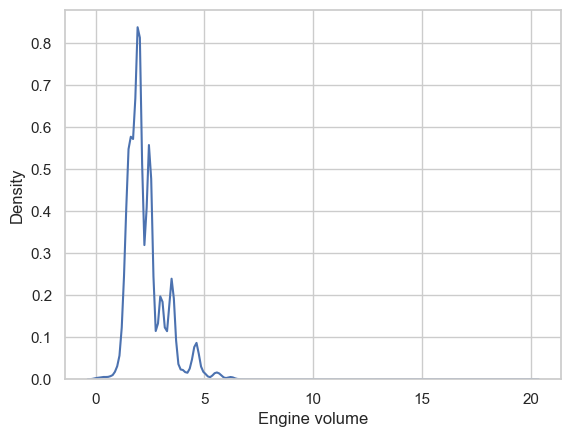

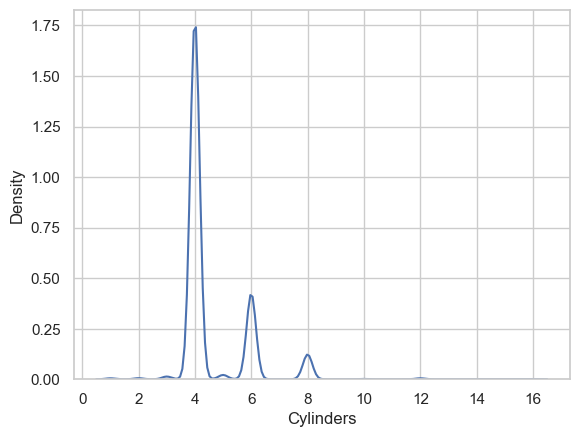

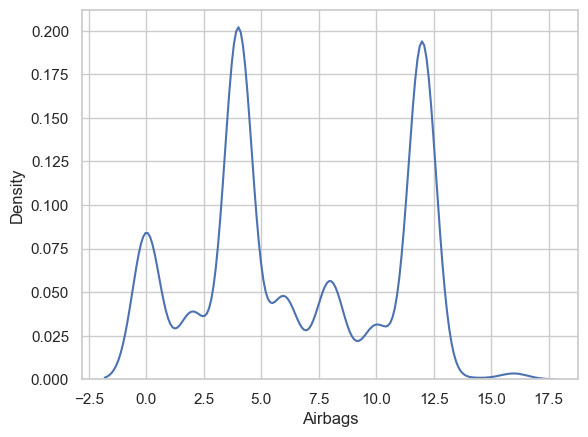

In [151]:
for col in data.select_dtypes('number').columns:
    sns.kdeplot(data[col])
    plt.show()

## 4. Correlations

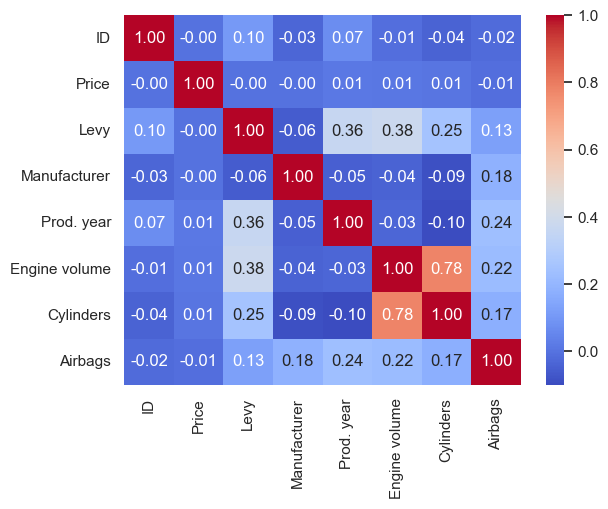

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


## 5. Feature Interactions

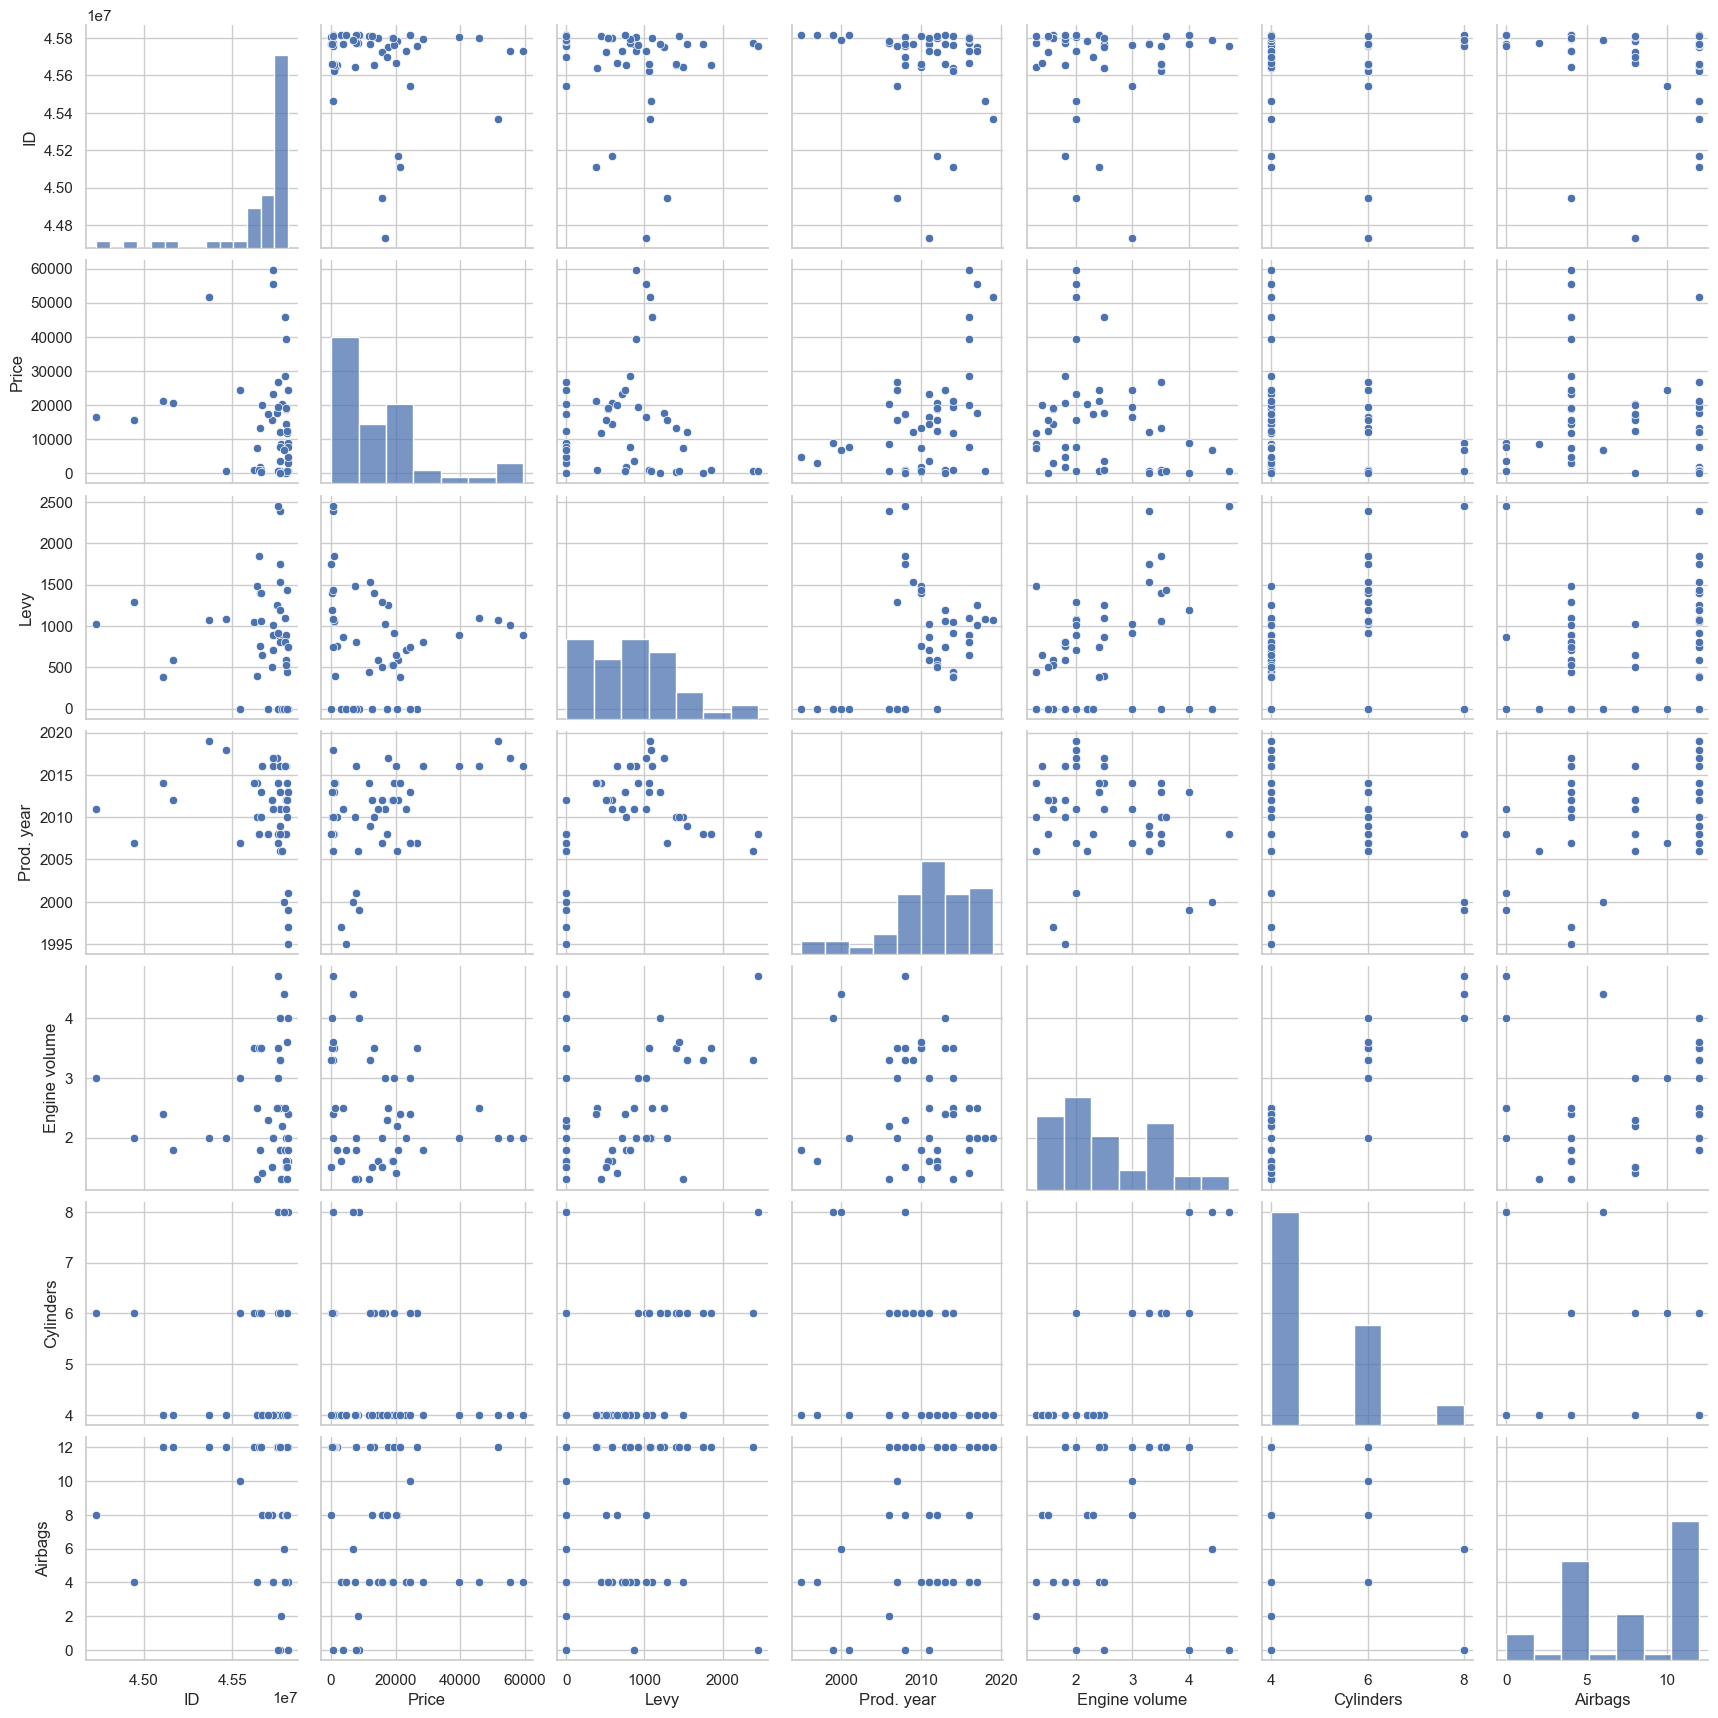

In [153]:
sns.pairplot(data[:50])
plt.show()

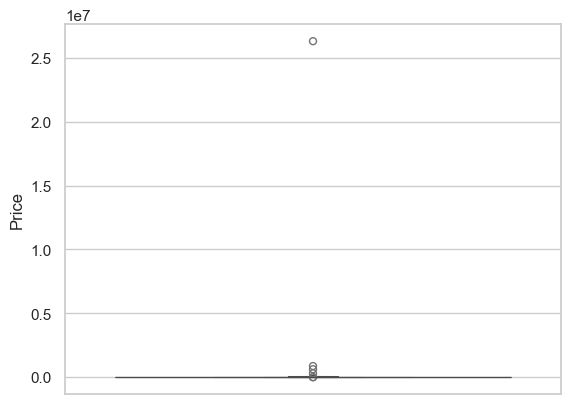

In [154]:
sns.boxenplot(data['Price'])
plt.show()

In [155]:
data[data['Price']> 5e5]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
1225,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0 km,8.0,Tiptronic,4x4,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531 km,8.0,Tiptronic,4x4,Left wheel,Black,0
16983,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,Left wheel,Blue,0


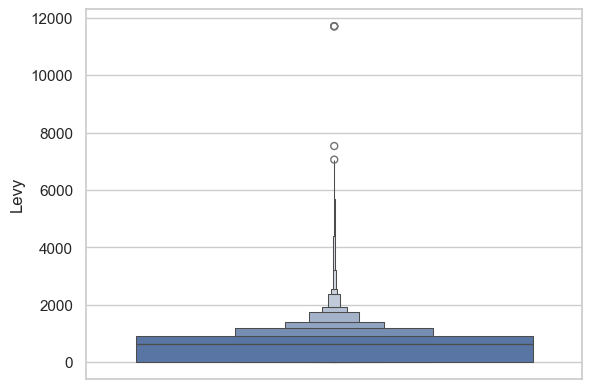

In [156]:
sns.boxenplot(data['Levy'])
plt.show()

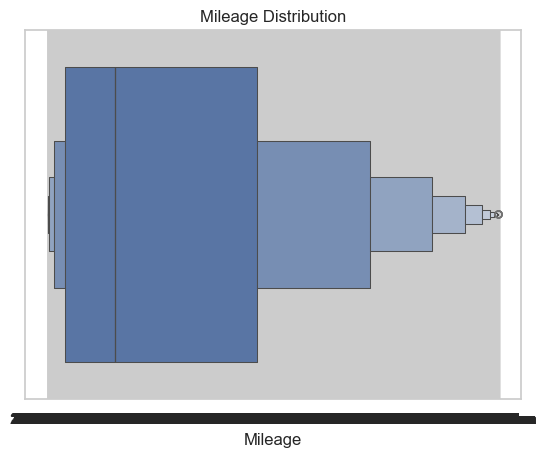

In [157]:
sns.boxenplot(x=data['Mileage'])
plt.title('Mileage Distribution')
plt.show()


In [158]:
def clean_outliers(df, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile range

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to remove outliers
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_no_outliers


In [159]:
# Convert 'Price', 'Mileage', and 'Levy' to numeric values
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Mileage'] = data['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')


In [160]:
# Clean outliers for 'Price', 'Mileage', and 'Levy' columns
data = clean_outliers(data, 'Price')
data = clean_outliers(data, 'Mileage')
data = clean_outliers(data, 'Levy')


In [161]:
data.shape

(17084, 17)

## 6. Target Variable Analysis

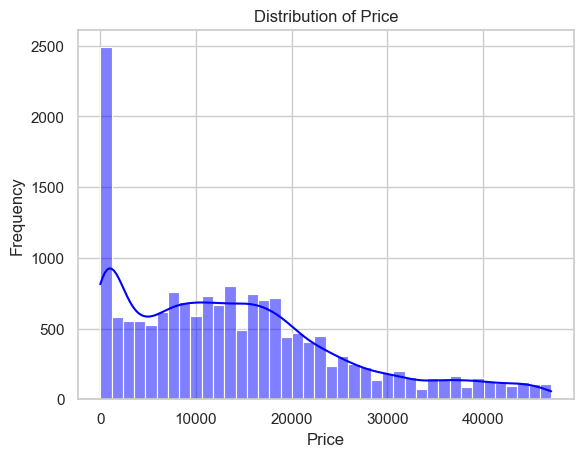

In [162]:
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


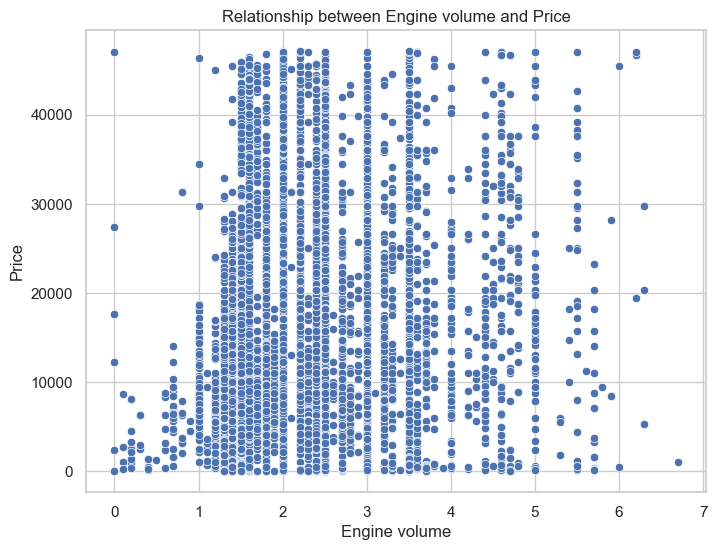

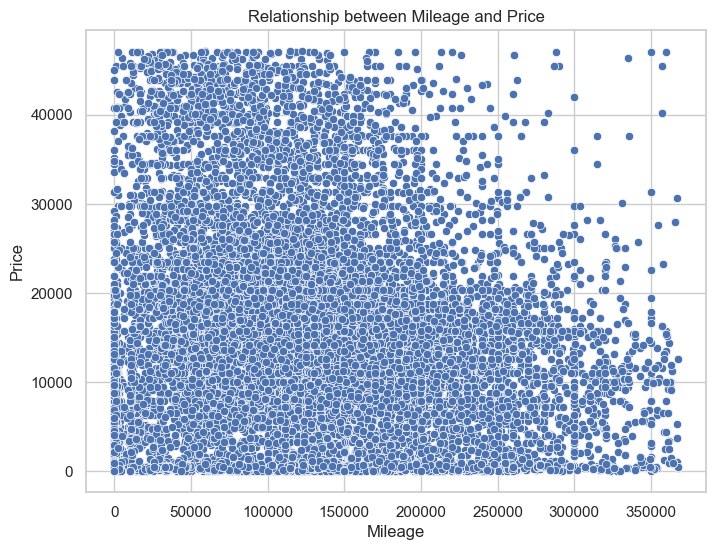

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine volume', y='Price', data=data)
plt.title('Relationship between Engine volume and Price')
plt.xlabel('Engine volume')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

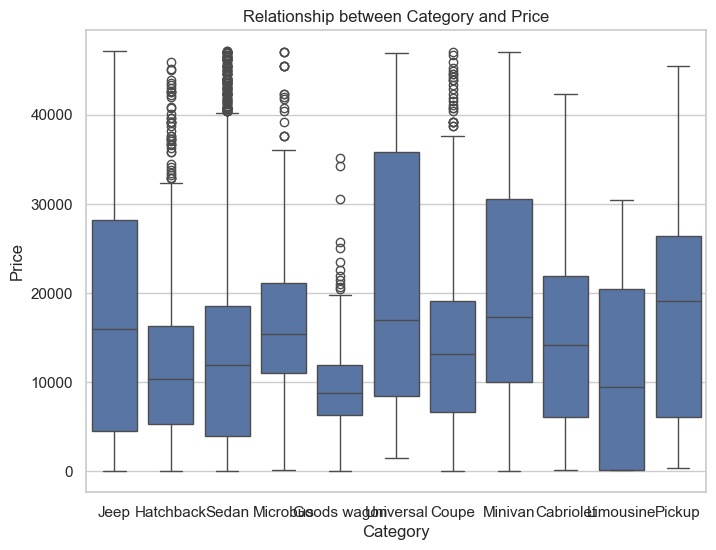

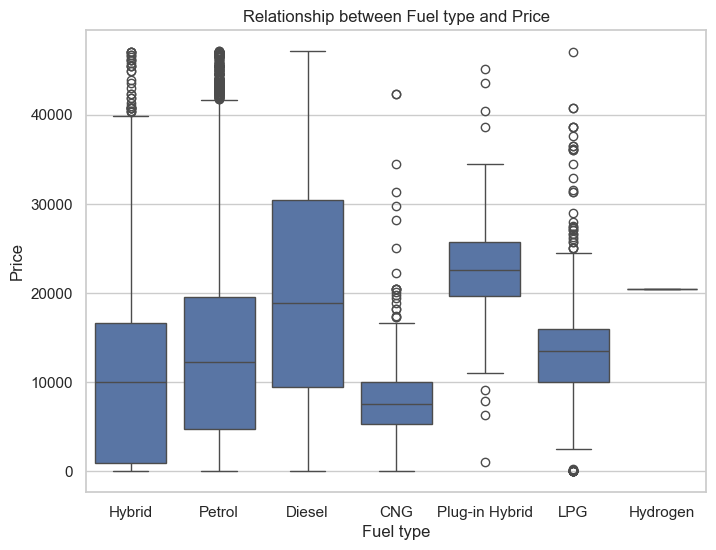

In [164]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Relationship between Category and Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel type', y='Price', data=data)
plt.title('Relationship between Fuel type and Price')
plt.xlabel('Fuel type')
plt.ylabel('Price')
plt.show()